In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt 


# Show embedding scores

In [2]:
def get_fscores(dataset_name):
    fscores = defaultdict(list)
    experiment_meaning = "seg_emb_method"
    emb_method = ['max', 'mean', 'attention']
    excel_path = f"../results/experiment_{experiment_meaning}_{dataset_name}.xlsx"
    for method in emb_method:
        df = pd.read_excel(excel_path, sheet_name=f"{method}")
        fscores['segment_embedding_method'].append(method)
        fscores['value'].append(df.loc[10, 'splits_avg_fscore'])
    
    df = pd.DataFrame(fscores)
    return df

df_tvsum = get_fscores("TVSum")
df_summe = get_fscores("SumMe")

In [3]:
df_tvsum

,segment_embedding_method,value
0,max,59.027281
1,mean,59.092349
2,attention,49.245170


In [4]:
df_summe

,segment_embedding_method,value
0,max,52.384145
1,mean,52.004097
2,attention,47.897750


# Visualize sigma

In [5]:
def get_fscores(dataset_name):
    fscores = defaultdict(list)
    experiment_meaning = "sigma"
    all_sigma = np.round(np.arange(0, 1.1, 0.1), 1)
    excel_path = f"../results/experiment_{experiment_meaning}_{dataset_name}.xlsx"
    for sigma in all_sigma:
        df = pd.read_excel(excel_path, sheet_name=f"{sigma}")
        fscores['sigma'].append(sigma)
        fscores['value'].append(df.loc[10, 'splits_avg_fscore'])
    
    df = pd.DataFrame(fscores)
    return df

df_tvsum = get_fscores("TVSum")
df_summe = get_fscores("SumMe")

In [6]:
df_summe

,sigma,value
0,0.0,47.888373
1,0.1,51.940579
2,0.2,52.249227
3,0.3,51.480180
4,0.4,52.273180
5,0.5,52.384145
6,0.6,51.909754
7,0.7,51.068109
8,0.8,51.257957
9,0.9,51.907298


In [7]:
df_tvsum

,sigma,value
0,0.0,30.821596
1,0.1,55.543758
2,0.2,52.705575
3,0.3,53.637260
4,0.4,55.946372
5,0.5,59.027281
6,0.6,60.580183
7,0.7,61.366564
8,0.8,61.666608
9,0.9,61.854291


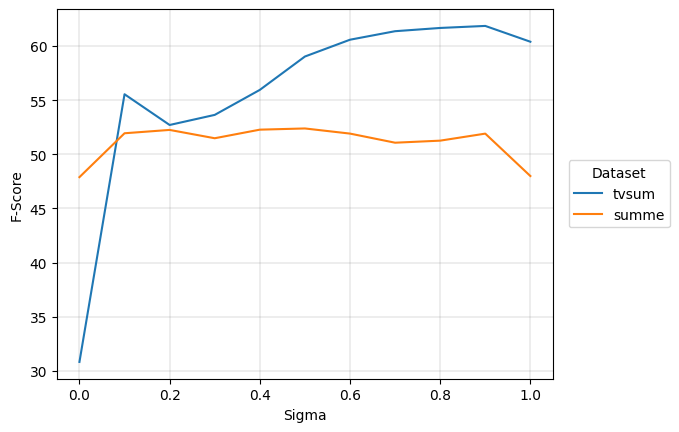

In [8]:
plt.plot(df_tvsum['sigma'], df_tvsum['value'], label="tvsum")   # plot bars
plt.plot(df_summe['sigma'], df_summe['value'], label="summe")   # plot bars
plt.grid(color='grey', linestyle='-', linewidth=0.2)
plt.legend(title="Dataset", loc='center right', bbox_to_anchor=(1.25, 0.5))

plt.ylabel("F-Score")
plt.xlabel("Sigma")
plt.show()

# Visualize blocksize

In [9]:
def get_fscores(dataset_name):
    fscores = defaultdict(list)
    experiment_meaning = "blocksize"
    all_blocksize = range(1, 6)
    if dataset_name == 'SumMe':
        all_sigma = np.round(np.arange(0.2, 0.6, 0.1), 1)
    elif dataset_name == "TVSum":
        all_sigma = np.round(np.arange(0.7, 1.0, 0.1), 1)
    excel_path = f"../results/experiment_{experiment_meaning}_{dataset_name}.xlsx"
    for size in all_blocksize:
        for sigma in all_sigma:
            df = pd.read_excel(excel_path, sheet_name=f"{size}_{sigma}")
            fscores['blocksize'].append(size)
            fscores['sigma'].append(sigma)
            fscores['value'].append(df.loc[10, 'splits_avg_fscore'])

    df = pd.DataFrame(fscores)
    return df

df_summe = get_fscores("SumMe")
df_tvsum = get_fscores("TVSum")

In [10]:
df_summe

,blocksize,sigma,value
0,1,0.2,53.979494
1,1,0.3,54.078419
2,1,0.4,53.052864
3,1,0.5,53.101473
4,2,0.2,53.952176
5,2,0.3,53.942076
6,2,0.4,53.478383
7,2,0.5,53.753468
8,3,0.2,53.666808
9,3,0.3,53.703237


In [11]:
max(df_summe['value'])

54.07841892544599

In [12]:
df_tvsum

,blocksize,sigma,value
0,1,0.7,61.115044
1,1,0.8,61.506182
2,1,0.9,61.911523
3,1,1.0,60.054928
4,2,0.7,61.072070
5,2,0.8,61.714278
6,2,0.9,62.024443
7,2,1.0,59.756446
8,3,0.7,60.979212
9,3,0.8,61.747770


In [13]:
max(df_tvsum['value'])

62.02444304883663

   blocksize  sigma      value
0          1    0.2  53.979494
1          1    0.3  54.078419
2          1    0.4  53.052864
3          1    0.5  53.101473
   blocksize  sigma      value
4          2    0.2  53.952176
5          2    0.3  53.942076
6          2    0.4  53.478383
7          2    0.5  53.753468
    blocksize  sigma      value
8           3    0.2  53.666808
9           3    0.3  53.703237
10          3    0.4  53.650716
11          3    0.5  53.216754
    blocksize  sigma      value
12          4    0.2  53.486289
13          4    0.3  53.359158
14          4    0.4  53.242325
15          4    0.5  53.717862
    blocksize  sigma      value
16          5    0.2  53.376253
17          5    0.3  53.371958
18          5    0.4  53.375280
19          5    0.5  54.044049


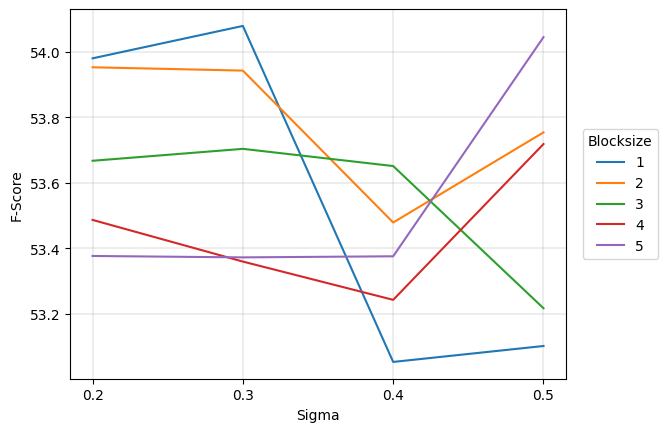

In [14]:
for size in range(1, 6):
    df = df_summe[df_summe['blocksize'] == size]
    print(df)
    plt.plot(df['sigma'], df['value'], label=size)   # plot bars

plt.grid(color='grey', linestyle='-', linewidth=0.2)
plt.legend(title="Blocksize", loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.ylabel("F-Score")
plt.xlabel("Sigma")
plt.xticks(np.arange(0.2, 0.6, 0.1))
plt.show()

   blocksize  sigma      value
0          1    0.7  61.115044
1          1    0.8  61.506182
2          1    0.9  61.911523
3          1    1.0  60.054928
   blocksize  sigma      value
4          2    0.7  61.072070
5          2    0.8  61.714278
6          2    0.9  62.024443
7          2    1.0  59.756446
    blocksize  sigma      value
8           3    0.7  60.979212
9           3    0.8  61.747770
10          3    0.9  61.906092
11          3    1.0  59.383107
    blocksize  sigma      value
12          4    0.7  60.936837
13          4    0.8  61.528951
14          4    0.9  61.621786
15          4    1.0  59.560161
    blocksize  sigma      value
16          5    0.7  61.229148
17          5    0.8  61.448736
18          5    0.9  61.798996
19          5    1.0  59.199114


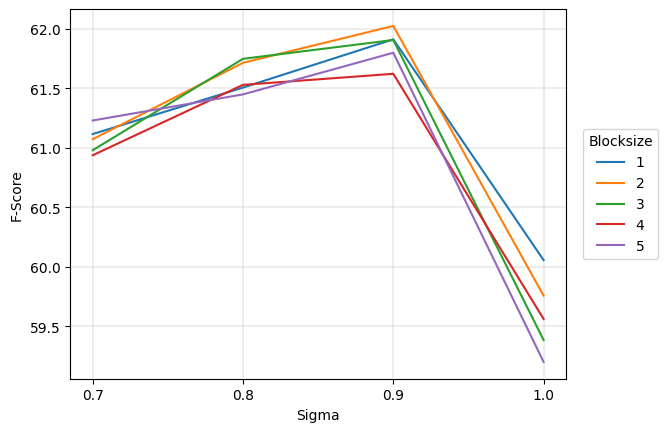

In [15]:
for size in range(1, 6):
    df = df_tvsum[df_tvsum['blocksize'] == size]
    print(df)
    plt.plot(df['sigma'], df['value'], label=size)   # plot bars

plt.grid(color='grey', linestyle='-', linewidth=0.2)
plt.legend(title="Blocksize", loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.ylabel("F-Score")
plt.xlabel("Sigma")
plt.xticks(np.arange(0.7, 1, 0.1))
plt.show()